## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 9: ML
## Due 4 December, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebooks for lecture 9. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- Most of the lecture notes come from two sources. The first is the following book:
    > Goodfellow, [Deep Learning](http://www.deeplearningbook.org/). 

  and the other is the pytorch web page. In particular, the [tutorial page](https://pytorch.org/tutorials/) is great. 
 



In [17]:
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

### 1. XNOR 

Recall the two layer network with two inputs and two hidden nodes corresponds to the equations below, where $g$ is the Rectified Linear Unit function. **By hand, find weights and biases so that this network computes the XNOR function** (instead of XOR as shown in class. 

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
      w_{13} & w_{23} \\
      w_{14} & w_{24}
    \end{pmatrix}
      \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} 
    + \begin{pmatrix}b_3 \\ b_4\end{pmatrix} 
\right )
$$

and

$$
x_5 = 
g \left ( 
      \begin{pmatrix} w_{35} & w_{45} \end{pmatrix}
      \begin{pmatrix} x_3 \\ x_4 \end{pmatrix} 
    + b_5 
\right )
$$

with 

$y = x_5$ being the output.

**Grading Breakdown:**

    2pts for finding suitable weights and biases
    2pts per computation using each input vector  (8pts total)

***
1)


**First we'll set our parameters** $\theta = (W^T,w,c,b_5)$:

$$
\begin{pmatrix}
  w_{13} & w_{23} \\
  w_{14} & w_{24}
\end{pmatrix} = \begin{pmatrix}
  1 & -1 \\
  2 & -2
\end{pmatrix}, \;\; 
\begin{pmatrix}
  w_{35} \\
  w_{45} 
\end{pmatrix} = \begin{pmatrix}
  1 \\
  -1 \end{pmatrix},\;\;
\begin{pmatrix}
  b_3 \\
  b_4
\end{pmatrix} = \begin{pmatrix}
  2 \\
  0
\end{pmatrix}
, \;\;
b_5 = -1 .
$$

Note that these are **not unique**. An alternative set is

$$
\begin{pmatrix}
  w_{13} & w_{23} \\
  w_{14} & w_{24}
\end{pmatrix} = \begin{pmatrix}
  1 & 1 \\
  -2 & -2
\end{pmatrix}, \;\; 
\begin{pmatrix}
  w_{35} \\
  w_{45} 
\end{pmatrix} = \begin{pmatrix}
  1 \\
  2 \end{pmatrix},\;\;
\begin{pmatrix}
  b_3 \\
  b_4
\end{pmatrix} = \begin{pmatrix}
  0 \\
  1
\end{pmatrix}
, \;\;
b_5 = -1 .
$$

---

On the input $(0 \; 0)^T$ the first layer of the network computes

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
        1 & -1 \\
        2 & -2
    \end{pmatrix}
      \begin{pmatrix} 0 \\ 0 \end{pmatrix} 
    + \begin{pmatrix} 2 \\ 0\end{pmatrix} 
\right ) = g \begin{pmatrix} 2 \\ 0 \end{pmatrix} 
         = \begin{pmatrix} 2 \\ 0 \end{pmatrix} 
$$

and the second layer computes 

$$
y = x_5 = 
g \left ( 
      \begin{pmatrix} 1 & -1 \end{pmatrix}
      \begin{pmatrix} 2 \\ 0 \end{pmatrix} 
    + (-1)
\right ) = g(1) = 1 .
$$


---

On the input $(0 \; 1)^T$ the first layer of the network computes

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
        1 & -1 \\
        2 & -2
    \end{pmatrix}
      \begin{pmatrix} 0 \\ 1 \end{pmatrix} 
    + \begin{pmatrix} 2 \\ 0\end{pmatrix} 
\right ) = g \begin{pmatrix} 1 \\ -2 \end{pmatrix} 
         = \begin{pmatrix} 1 \\ 0 \end{pmatrix} 
$$

and the second layer computes 

$$
x_5 = 
g \left ( 
      \begin{pmatrix} 1 & -1 \end{pmatrix}
      \begin{pmatrix} 1 \\ 0 \end{pmatrix} 
    + (-1)
\right ) = g(0) = 0 .
$$


---

On the input $(1 \; 0)^T$ the first layer of the network computes

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
        1 & -1 \\
        2 & -2
    \end{pmatrix}
      \begin{pmatrix} 1 \\ 0 \end{pmatrix} 
    + \begin{pmatrix} 2 \\ 0\end{pmatrix} 
\right ) = g \begin{pmatrix} 3 \\ 2 \end{pmatrix} 
         = \begin{pmatrix} 3 \\ 2 \end{pmatrix} 
$$

and the second layer computes 

$$
x_5 = 
g \left ( 
      \begin{pmatrix} 1 & -1 \end{pmatrix}
      \begin{pmatrix} 3 \\ 2 \end{pmatrix} 
    + (-1)
\right ) = g(0) = 0 .
$$


---

On the input $(1 \; 1)^T$ the first layer of the network computes

$$
\begin{pmatrix} x_3 \\ x_4 \end{pmatrix} = 
g \left ( 
    \begin{pmatrix}
        1 & -1 \\
        2 & -2
    \end{pmatrix}
      \begin{pmatrix} 1 \\ 1 \end{pmatrix} 
    + \begin{pmatrix} 2 \\ 0\end{pmatrix} 
\right ) = g \begin{pmatrix} 1 \\ 0 \end{pmatrix} 
         = \begin{pmatrix} 2 \\ 0 \end{pmatrix} 
$$

and the second layer computes 

$$
x_5 = 
g \left ( 
      \begin{pmatrix} 1 & -1 \end{pmatrix}
      \begin{pmatrix} 2 \\ 0 \end{pmatrix} 
    + (-1)
\right ) = g(1) = 1 .
$$


In [3]:
def g(x):
    '''A simple ReLU function'''
    return np.maximum(np.zeros_like(x), x)

def f(ins):
    '''A simple neural network computation like in class'''
    return g(w @ g(W @ ins + c) + b)

# Truth table inputs
in1 = np.array([[0],[0]])
in2 = np.array([[0],[1]])
in3 = np.array([[1],[0]])
in4 = np.array([[1],[1]])

In [25]:
params = [] # emtpy list of parameters
iters = 0;

while True: # assign random ints and loop until we have the desired parameters
    iters += 1
    #PARAMETERS: weights and biases
    w13,w23,w14,w24 = np.random.randint(-2,3),np.random.randint(-2,3),np.random.randint(-2,3),np.random.randint(-2,3)
    W = np.array([[w13,w23],[w14,w24]])
    c = np.array([[np.random.randint(-2,3)],[np.random.randint(-2,3)]]) 
    b = np.random.randint(-2,3)
    w = np.array([np.random.randint(-2,3),np.random.randint(-2,3)]) 
    if f(in1)[0]==1 and f(in2)[0]==0 and f(in3)[0]==0 and f(in4)[0]==1: # Success Criterion
        params += [W,c,w,b]
        print(iters)
        break
        
for i in params:
    print('\n',i)

10894

 [[ 2 -2]
 [-1  2]]

 [[-1]
 [-1]]

 [-1 -2]

 1


## Some Resources:

- https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2,1&seed=0.00814&showTestData=false&discretize=false&percTrainData=90&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


- https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182

**Math Resources:**

- The Matrix Calculus You Need For Deep Learning: https://explained.ai/matrix-calculus/

- Practical Guide to Matrix Calculus for Deep Learning: https://pdfs.semanticscholar.org/d5cd/a24863b9b6021191c164bde0a197b74115c1.pdf

- Mathematics for Machine Learning (paper): https://gwthomas.github.io/docs/math4ml.pdf

- Mathematics for Machine Learning (book): https://mml-book.github.io/book/mml-book.pdf


**Using the Sigmoid Fuction Instead:**
- http://neuralnetworksanddeeplearning.com/chap1.html

- https://www.coursera.org/lecture/machine-learning/examples-and-intuitions-ii-solUx

- https://chih-ling-hsu.github.io/2017/08/30/NN-XOR

- http://holehouse.org/mlclass/08_Neural_Networks_Representation.html

### 2. PyTorch

Modify the PyTorch example below so that it learns to classify inputs with a **3x3 checkerboard** instead of the 2x2 checkerboard shown in class. Answer the following questions

a) What is the effect of changing the learning rate to 0.01?

b) What is the effect of changing the learning rate to 0.001?

c) What is the effect of using only 2 nodes in the hidden layer? 

d) What is the effect of using only 2000 nodes in the hidden layer? 

Note that if this code does not work on your laptop, you probably need to install PyTorch. Alternatively, you could use Google CoLab.

**Grading Breakdown:** (Results may vary depending on parameter choices)

    2.5pts per reflection that's reasonably similar to the ones below (10pts total)

***
2.a)

After changing the learning rate to $0.01$ the corresponding output was a well classified $3\times 3$ checkerboard, with a classification error of $2.0\%$. The Cross Entropy Loss function (which measures the liklihood that a sample drawn from probability distribution $q$ could have come from $p$) dropped steeply from around 0.7 to at lower bound slightly greater than $0.3$.

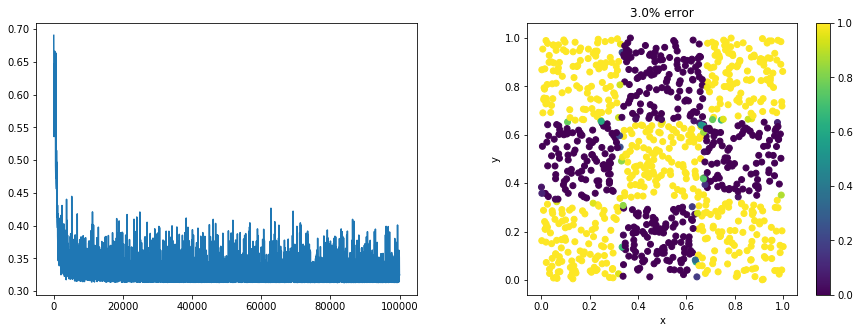

In [304]:
# First, we define a class that returns a neural network with
# two fully connected layers
class ModelTwo(nn.Module): # number of hidden layers
    def __init__(self,size):
        super(ModelTwo, self).__init__()
        self.fc1 = nn.Linear(2,size)
        self.fc2 = nn.Linear(size,2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x),dim=1) # Turns each output into a probability
                                         # distribution over {0,1}. In this case 
                                         # it returns (e^x1 e^x2) / ( e^x1 + e^x2 ). 
        return x
    
def make_data(n):
    x = torch.rand(n,2)
    y = torch.tensor([             # Conditions that describe a 3x3 "checkerboard"
        (q[0]<1/3 and q[1]<1/3) or
        (q[0]<1/3 and q[1]>2/3) or
        (q[0]>2/3 and q[1]<1/3) or
        (q[0]<2/3 and q[0]>1/3 and q[1]>1/3 and q[1]<2/3) or
        (q[0]> 2/3 and q[1]>2/3) 
        for q in x
    ],dtype=torch.long)     
    return x,y

def show_predictions(model, ax):
    x,y = make_data(1000)
    yhat = model(x)
    prediction = torch.argmax(yhat,dim=1) 
    err = 100 * torch.sum(torch.abs(y - prediction)) / 1000
    p = ax.scatter(x[:,0], x[:,1], c=yhat[:,1].detach(), vmin=0, vmax=1)
    ax.set_aspect(1)  
    ax.set_title("%0.1f%% error" % err)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.colorbar(p)    

model = ModelTwo(100) # 100 neurons in the hidden layer helps assure that some reachable
                      # local minima computes the right function. In the trained model,
                      # some neurons may not do anything useful.  
        
criterion = nn.CrossEntropyLoss() # a comparison of the target probability distribution  p  against the predicted distribution \hat p .
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # LEARNING RATE

data = []

fig,ax=plt.subplots(1,2,figsize=(15,5))

for _ in range(1000):
    x,y = make_data(100) 
    for _ in range(100): #play with this value if output is wonky
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat,y)
        data.append(loss)
        loss.backward() 
        optimizer.step()

ax[0].plot(data)
show_predictions(model, ax[1])    

***
2.b)

After changing the learning rate to $0.001$ the corresponding output was a well classified $3\times 3$ checkerboard, with a classification error of $2.0\%$. The Cross Entropy Loss function (which measures the liklihood that a sample drawn from probability distribution $q$ could have come from $p$) varied between an upper bound of slightly less than $0.4$ and a lower bound slightly greater than $0.31$.

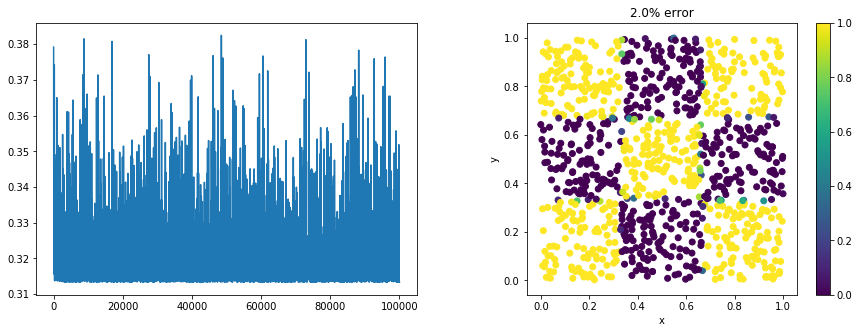

In [305]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # LEARNING RATE

data = []

fig,ax=plt.subplots(1,2,figsize=(15,5))

for _ in range(1000):
    x,y = make_data(100) 
    for _ in range(100): #play with this value if output is wonky
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat,y)
        data.append(loss)
        loss.backward() 
        optimizer.step()

ax[0].plot(data)
show_predictions(model, ax[1])   

***
2.c)

After changing the number of neurons in the hidden layer to be $2$ (and choosing a learning rate of $0.001$) the corresponding output was an extremely poorly classified approximation of a $3\times 3$ checkerboard, with a classification error of $46.0\%$. Most of the points were classified according to the mean value and appear to be separated crudely by a single hyperplane. The Cross Entropy Loss function (which measures the liklihood that a sample drawn from probability distribution $q$ could have come from $p$) continued to vary between $0.72$ and a lower bound slightly greater than $0.6$.

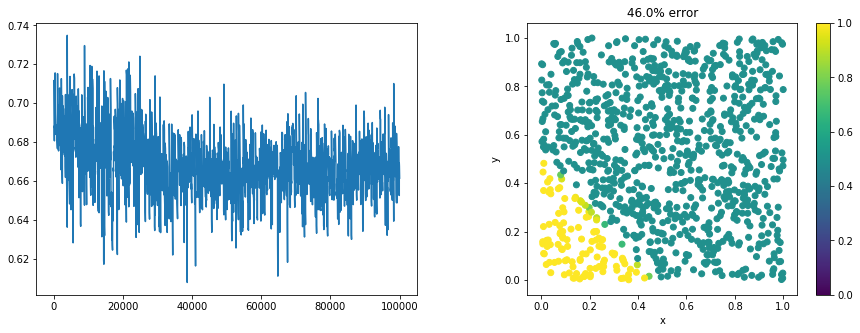

In [306]:
model = ModelTwo(2) # 2 neurons in the hidden layer helps assure that some reachable
                      # local minima computes the right function. In the trained model,
                      # some neurons may not do anything useful.  
        
criterion = nn.CrossEntropyLoss() # a comparison of the target probability distribution  p  against the predicted distribution \hat p .
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # LEARNING RATE

data = []

fig,ax=plt.subplots(1,2,figsize=(15,5))

for _ in range(1000):
    x,y = make_data(100) 
    for _ in range(100): #play with this value if output is wonky
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat,y)
        data.append(loss)
        loss.backward() 
        optimizer.step()

ax[0].plot(data)
show_predictions(model, ax[1])   

***
2.d)

After changing the number of neurons in the hidden layer to be $2000$ (and choosing a learning rate of $0.001$) the corresponding output was a well classified $3\times 3$ checkerboard, with a classification error of $3.0\%$. The Cross Entropy Loss function (which measures the liklihood that a sample drawn from probability distribution $q$ could have come from $p$) dropped steeply from around 0.7 to varying about an upper bound less than $0.45$ and a lower bound slightly greater than $0.3$.

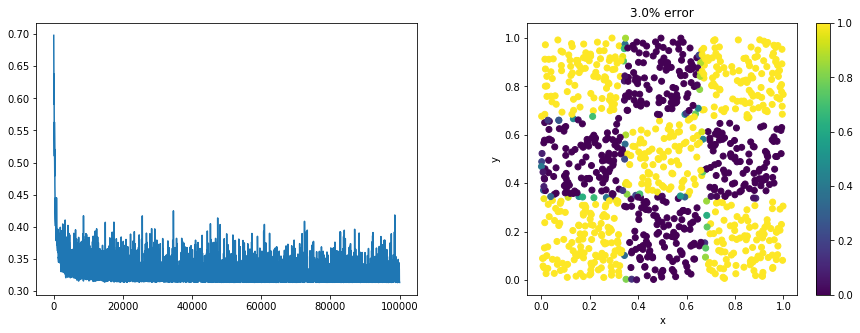

In [307]:
model = ModelTwo(2000) # 2000 neurons in the hidden layer helps assure that some reachable
                      # local minima computes the right function. In the trained model,
                      # some neurons may not do anything useful.  
        
criterion = nn.CrossEntropyLoss() # a comparison of the target probability distribution  p  against the predicted distribution \hat p .
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # LEARNING RATE

data = []

fig,ax=plt.subplots(1,2,figsize=(15,5))

for _ in range(1000):
    x,y = make_data(100) 
    for _ in range(100): #play with this value if output is wonky
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat,y)
        data.append(loss)
        loss.backward() 
        optimizer.step()

ax[0].plot(data)
show_predictions(model, ax[1])   

### Some Resources:

#### Start here for installations:
- https://deeplizard.com/learn/video/UWlFM0R_x6I

#### Then move to:
- https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
- https://pytorch.org/tutorials/beginner/ptcheat.html
- http://colah.github.io/posts/2014-07-Conv-Nets-Modular/
- http://colah.github.io/posts/2014-07-Understanding-Convolutions/

#### Other:
- https://deeplizard.com/learn/video/gZmobeGL0Yg

### 3 Literature

Read the following three articles and then answer the questions below. Note that if you are not at UW you may need to use the [library proxy system](https://www.lib.washington.edu/help/connect) to get access to these papers.

- [Deep Learning](https://www-nature-com.offcampus.lib.washington.edu/articles/nature14539)
- [How To Deal With Machine Learning Papers](https://blogs.sciencemag.org/pipeline/archives/2019/11/20/how-to-deal-with-machine-learning-papers)

Answer

- a) Why are local minima not a problem in large neural networks?
- b) Why might scientists be skeptical of the use neural networks to understand scientific data?
- c) Computational neural networks were not considered practical in the 1990s. What changed?
- d) What safety and security issues are unique to the use of neural networks for engineering purposes?
- e) What are three applications of machine learning you had not heard of that sound interesting to you?
- f) What are the limitations of deep learning?

**Grading Breakdown:** (Note that results may vary)

    10/6pts per question

***
3.a)

**Q:** 
Why are local minima not a problem in large neural networks?

**A:**
"Regardless of the initial conditions, the system nearly always
reaches solutions of very similar quality. Recent theoretical and
empirical results strongly suggest that local minima are not a serious
issue in general. Instead, the landscape is packed with a combinatorially large number of saddle points where the gradient is zero, and the surface curves up in most dimensions and curves down in the remainder. The analysis seems to show that saddle points with only a few downward curving directions are present in very large numbers, but almost all of them have very similar values of the objective function. Hence, it does not much matter which of these saddle points the algorithm gets stuck at." --Deep Learning pg. 438-439

***
3.b)

**Q:**
Why might scientists be skeptical of the use neural networks to understand scientific data?

**A:**
One reason, stated in the second article is that many scientists just don't understand neural networks to begin with. Secondly, every deep-learning algorithm has vulnerabilities. This has been shown in the literature through adversarial attacks on training data which, for example, can produce competely incorrect classifications despite the images seeming unaltered to the human eye. Thirdly, there can be issues with transfer from the reference set to another application (i.e. just because it performed well with the training data set does not guarantee good performance in transfer due to unintended biases). There's also the issue of repeatability and reproducibility to consider.

***
3.c)

**Q:** 
Computational neural networks were not considered practical in the 1990s. What changed?

**A:**
"In the late 1990s, neural nets and backpropagation were largely forsaken by the machine-learning community and ignored by the computer-vision and speech-recognition communities. It was widely thought that learning useful, multistage, feature extractors with little prior knowledge was infeasible. In particular, it was commonly thought that simple gradient descent would get trapped in poor local minima — weight configurations for which no small change would reduce the average error." ---Deep Learning pg. 438

Then, in 2006, "a group of researchers brought together by the Canadian Institute for Advanced Research...introduced unsupervised learning procedures that could create layers of feature detectors without requiring labelled data." --Deep Learning pg. 439. This initiated several papers that had termendous success in certain applications.

***
3.d)

**Q:**
What safety and security issues are unique to the use of neural networks for engineering purposes?

**A:**
Such concerns include, but are not limited to, adversarial networks that can cause completley incorrect classifications and biases in the training data which cause neural networks to fail to properly transfer to applications (i.e. IBM's Watson telling a patient they have cancer when they actually don't). 

***
3.e)

**Q:**
What are three applications of machine learning you had not heard of that sound interesting to you?

**A:**
Results may vary.

***
3.f)

**Q:**
What are the limitations of deep learning?

**A:**
Deep learning requires large amounts of input data in order to be effective and few companies and institutions have the resouces needed--and even then deep learning is difficult to engineer with. Anything that requires reasoning is out of reach for current deep learning algorithms and when the test set differs importantly from the training set, or when the space of examples is novel efficacy is reduced. 

The list goes on:
- Deep Learning- A Critical Appraisal: https://arxiv.org/ftp/arxiv/papers/1801/1801.00631.pdf
- The limitations of deep learning: https://blog.keras.io/the-limitations-of-deep-learning.html
- https://thegradient.pub/the-limitations-of-visual-deep-learning-and-how-we-might-fix-them/
- https://medium.com/@GaryMarcus/in-defense-of-skepticism-about-deep-learning-6e8bfd5ae0f1

### Some Resources:

- A Few Useful Things to Know About Machine Learning: https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf


- CS229 Lecture Notes- Deep Learning: http://cs229.stanford.edu/notes/cs229-notes-deep_learning.pdf


- Convolutional Neural Networks for Visual Recognition Course: http://cs231n.github.io/